# Import Libraries

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

**First, read the data file**

**seconds display data information**

**Third, make sure that there are no empty values**

In [14]:
data_gold = pd.read_csv('gld_price_data.csv')
data_gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [15]:
data_gold.shape

(2290, 6)

In [16]:
data_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
data_gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**We convert the Date column to date time so that we know the average prices for each year**

In [18]:
data_gold.Date = data_gold.Date.apply(pd.to_datetime)

In [19]:
data_gold['Year'] = pd.DatetimeIndex(data_gold['Date']).year
data_gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [21]:
data_gold.groupby('Year').mean()

,SPX,GLD,USO,SLV,EUR/USD
Year,,,,,
2008,1208.337274,86.111148,77.528756,14.760708,1.464481
2009,945.604864,95.834464,34.145446,14.478527,1.393900
2010,1142.600627,119.966397,36.651847,19.922883,1.330050
2011,1268.544188,152.591486,37.781486,34.118063,1.389480
2012,1378.354519,162.151507,35.541598,30.349772,1.287449
2013,1642.193891,136.853213,35.014751,23.179909,1.329559
2014,1930.589375,121.721294,33.887277,18.276295,1.327894
2015,2061.795563,111.165561,16.527623,14.999596,1.109867
2016,2091.121803,118.780634,10.474525,16.161176,1.105778


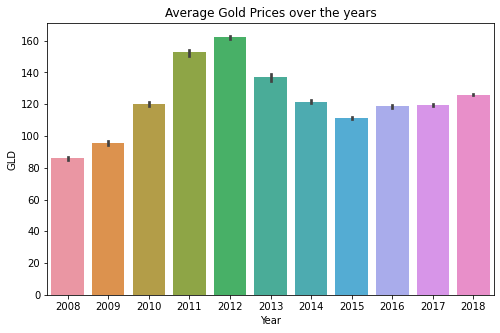

In [36]:
plt.figure(figsize=(8,5))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='GLD', data=data_gold);

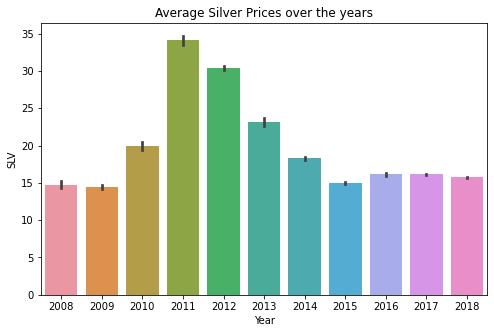

In [34]:
plt.figure(figsize=(8,5))
plt.title('Average Silver Prices over the years')
sns.barplot(x='Year', y='SLV', data=data_gold);

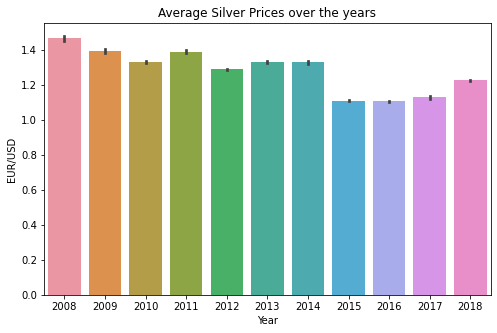

In [37]:
plt.figure(figsize=(8,5))
plt.title('Average Silver Prices over the years')
sns.barplot(x='Year',y='EUR/USD',data=data_gold);

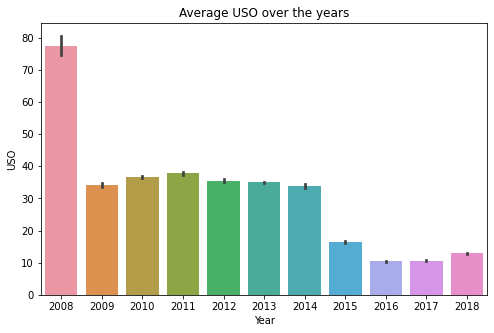

In [38]:
plt.figure(figsize=(8,5))
plt.title('Average USO over the years')
sns.barplot(x='Year', y='USO', data=data_gold);

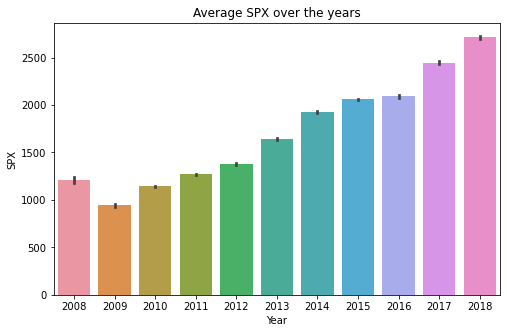

In [39]:
plt.figure(figsize=(8,5))
plt.title('Average SPX over the years')
sns.barplot(x='Year', y='SPX', data=data_gold);

In [40]:
X = data_gold.drop(['Date','GLD'],axis=1)
Y = data_gold['GLD']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=2)

In [55]:
print(f"Number of Training: {len(X_train)}\nNumber of Testing: {len(X_test)}")

Number of Training: 1603
Number of Testing: 687


In [63]:
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")
def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")  

# Random Forest Regressor

In [64]:
model_RFR = RandomForestRegressor()
model_train(model_RFR,'Random Forest Regressor')
r2(model_RFR,'Random Forest Regressor')


Random Forest Regressor model score on Train= 99.86492116007739%
Random Forest Regressor model score on Test= 99.20128947712993%
R2 Score for Random Forest Regressor is 99.20128947712993%


# LinearRegression

In [66]:
model_LR = LinearRegression()
model_train(model_LR,'LinearRegression')
r2(model_LR,'LinearRegression')

LinearRegression model score on Train= 90.27717730411928%
LinearRegression model score on Test= 89.67507516641639%
R2 Score for LinearRegression is 89.67507516641639%


# DecisionTreeRegressor

In [67]:
model_DTR = DecisionTreeRegressor()
model_train(model_DTR,'DecisionTreeRegressor')
r2(model_DTR,'DecisionTreeRegressor')

DecisionTreeRegressor model score on Train= 100.0%
DecisionTreeRegressor model score on Test= 98.91524747742776%
R2 Score for DecisionTreeRegressor is 98.91524747742776%


# xgboost

In [69]:
model_XG = XGBRegressor()
model_train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost model score on Train= 99.97203591172962%
XGBoost model score on Test= 99.08321406598498%
R2 Score for XGBoost is 99.08321406598498%
